In [2]:
from pprint import pprint
import sklearn.metrics
import autosklearn.classification
import timeit
import pandas as pd
from sklearn.model_selection import train_test_split


file_path = '../data/titanic_dirty_data.csv'
df = pd.read_csv(file_path)
df = df.dropna(subset=['Survived'])
y = df['Survived']
X = df.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time_budget = [30] #, 40, 60, 90, 120]
accuracy = []
precision = []
recall = []
leaderboard = []
config_list = []
for t in time_budget:
    print("Time budget:", t)
    automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=t,
    include = {
        'classifier': ["mlp"],
    },
    tmp_folder="tmp/autosklearn_classification_example_tmp",
    )

    automl.fit(X_train, y_train, dataset_name="airbnb")

    run_key = list(automl.automl_.runhistory_.data.keys())[0]
    run_value = automl.automl_.runhistory_.data[run_key]
    config=automl.automl_.runhistory_.ids_config[run_key.config_id]
    print("Config:", config)
    print("Leaderboard:", automl.leaderboard())
    config_list.append(str(config))
    leaderboard.append(str(automl.leaderboard()))

    predictions = automl.predict(X_test)
    # print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))
    # print("Precision", sklearn.metrics.precision_score(y_test, predictions))
    # print("Recall", sklearn.metrics.recall_score(y_test, predictions))
    accuracy.append(sklearn.metrics.accuracy_score(y_test, predictions))
    precision.append(sklearn.metrics.precision_score(y_test, predictions))
    recall.append(sklearn.metrics.recall_score(y_test, predictions))



Time budget: 30


/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(X[column]):
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Name has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Sex has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Ticket has generic type object. Autosklearn will treat this column as string. Please 

MLPP INITTT


Fitting to the training data:  17%|█▋        | 5/30 [00:05<00:25,  1.00s/it, The total time budget for this task is 0:00:30]

[WARNING] [2023-11-29 14:29:24,332:Client-AutoMLSMBO(1)::airbnb] Configuration 382 not found
[WARNING] [2023-11-29 14:29:24,332:Client-AutoMLSMBO(1)::airbnb] Configuration 251 not found
[WARNING] [2023-11-29 14:29:24,332:Client-AutoMLSMBO(1)::airbnb] Configuration 214 not found
[WARNING] [2023-11-29 14:29:24,332:Client-AutoMLSMBO(1)::airbnb] Configuration 467 not found
[WARNING] [2023-11-29 14:29:24,332:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found


Fitting to the training data:  20%|██        | 6/30 [00:06<00:24,  1.00s/it, The total time budget for this task is 0:00:30]

[WARNING] [2023-11-29 14:29:24,333:Client-AutoMLSMBO(1)::airbnb] Configuration 702 not found
[WARNING] [2023-11-29 14:29:24,333:Client-AutoMLSMBO(1)::airbnb] Configuration 701 not found
[WARNING] [2023-11-29 14:29:24,333:Client-AutoMLSMBO(1)::airbnb] Configuration 631 not found
[WARNING] [2023-11-29 14:29:24,333:Client-AutoMLSMBO(1)::airbnb] Configuration 566 not found
[WARNING] [2023-11-29 14:29:24,334:Client-AutoMLSMBO(1)::airbnb] Configuration 257 not found
[WARNING] [2023-11-29 14:29:24,334:Client-AutoMLSMBO(1)::airbnb] Configuration 7 not found
[WARNING] [2023-11-29 14:29:24,334:Client-AutoMLSMBO(1)::airbnb] Configuration 663 not found
[WARNING] [2023-11-29 14:29:24,334:Client-AutoMLSMBO(1)::airbnb] Configuration 332 not found
[WARNING] [2023-11-29 14:29:24,335:Client-AutoMLSMBO(1)::airbnb] Configuration 61 not found
[WARNING] [2023-11-29 14:29:24,335:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-29 14:29:24,335:Client-AutoMLSMBO(1)::airbnb] Configur

Fitting to the training data: 100%|██████████| 30/30 [00:20<00:00,  1.49it/s, The total time budget for this task is 0:00:30]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'data_preprocessor:feature_type:text_transformer:text_encoding:__choice__': 'tfidf_encoding'

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [2]:
print(accuracy)
print(precision)
print(recall)
# print(config_list)
# print(leaderboard)

[0.608]
[0.0]
[0.0]


Text(0.5, 0, 'Time Budget')

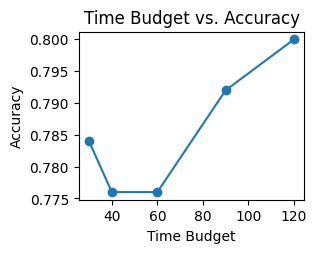

In [3]:
import matplotlib.pyplot as plt

# plt.subplot(2, 2, 1)
plt.plot(time_budget, accuracy, marker='o')
plt.title('Time Budget vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')

Text(0.5, 0, 'Time Budget')

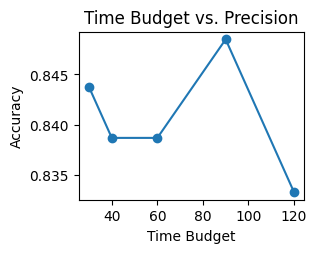

In [4]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time_budget, precision, marker='o')
plt.title('Time Budget vs. Precision')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')

Text(0.5, 0, 'Time Budget')

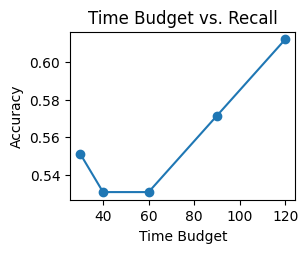

In [5]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time_budget, recall, marker='o')
plt.title('Time Budget vs. Recall')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')